# 1. 문제정의
- 사람별로 income을 예측하는것이 여러분의 목표입니다. 50k달러 초과면 1, 50k 달러 이하는 0입니다.

# 2. 데이터 수집

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

- 번호, 나이 ,?,?,교육,교육번호,?,직업,관계,인종?,성별,자본증가,자본감소,근로시간,본국,소득

In [335]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


# 3. 데이터 전처리

In [336]:
train.corr()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
no,1.000000,0.001111,0.002347,-0.008466,0.003916,0.003246,0.003166,-0.004080
age,0.001111,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,0.002347,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,-0.008466,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.003916,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.003246,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.003166,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,-0.004080,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


- 먼저 데이터 상관관계를 살펴본 결과 workclass와 fnlwgt는 소득에 영향을 거의 미치지 않는다
- 그래서 이 두 컬럼 삭제

In [313]:
# train.drop('workclass', axis = 1, inplace = True)
# test.drop('workclass', axis = 1, inplace = True)

# train.drop('fnlwgt', axis = 1, inplace = True)
# test.drop('fnlwgt', axis = 1, inplace = True)

<AxesSubplot:xlabel='workclass', ylabel='count'>

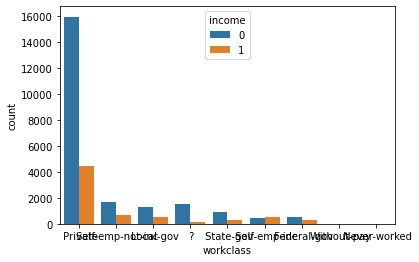

In [338]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'workclass', hue = 'income')

In [314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [315]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              19537 non-null  int64 
 1   age             19537 non-null  int64 
 2   workclass       19537 non-null  object
 3   fnlwgt          19537 non-null  int64 
 4   education       19537 non-null  object
 5   education-num   19537 non-null  int64 
 6   marital-status  19537 non-null  object
 7   occupation      19537 non-null  object
 8   relationship    19537 non-null  object
 9   race            19537 non-null  object
 10  sex             19537 non-null  object
 11  capital-gain    19537 non-null  int64 
 12  capital-loss    19537 non-null  int64 
 13  hours-per-week  19537 non-null  int64 
 14  native-country  19537 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.2+ MB


In [316]:
train['race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [317]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [318]:
train['occupation'].unique()

array([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', ' ?', ' Craft-repair',
       ' Sales', ' Armed-Forces'], dtype=object)

In [319]:
train['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

In [320]:
train['workclass'] = train['workclass'].str.strip()

In [321]:
train['workclass'].value_counts()

Private             20410
Self-emp-not-inc     2305
Local-gov            1868
?                    1663
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Never-worked            5
Name: workclass, dtype: int64

In [322]:
train_test_data = [train,test] # combining train and test dataset


In [323]:
workclass_mapping = {"Private": 0, "Self-emp-not-inc": 1, "Local-gov": 2, 
                 "?": ' ', "State-gov": 4, "Self-emp-inc": 5, "Federal-gov": 6,"Without-pay": 7,"Never-worked": 7 }

for dataset in train_test_data:
    dataset['workclass'] = dataset['workclass'].map(workclass_mapping)

In [324]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,0,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,0,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,0,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,0,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,0,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,0,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,0,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,1,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,0,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [325]:
for dataset in train_test_data:
    dataset.loc[dataset['age'] <= 16, 'age'] = 0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 26), 'age'] = 1
    dataset.loc[(dataset['age'] > 26) & (dataset['age'] <= 36), 'age'] = 2
    dataset.loc[(dataset['age'] > 36) & (dataset['age'] <= 62), 'age'] = 3
    dataset.loc[dataset['age'] > 62, 'age'] = 4

In [332]:
train.describe()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,14653.000000,2.349463,1.897357e+05,10.083057,1084.531786,87.073571,40.440096,0.240403
std,8459.769156,0.887398,1.056348e+05,2.570371,7495.715677,401.225580,12.332840,0.427335
min,1.000000,1.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7327.000000,2.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,14653.000000,3.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,21979.000000,3.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,29305.000000,4.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [333]:
table = train[['age','education-num','workclass']].groupby(by=['education-num','age']).median()

DataError: No numeric types to aggregate

In [309]:
table

workclass
education-num age           
1             1          0.0
              2          0.0
              3          0.0
              4          0.0
2             1          0.0
...                      ...
15            3          1.0
              4          1.0
16            2          0.0
              3          1.0
              4          3.0

[63 rows x 1 columns]

In [172]:
def fill_workclass(temp) :
    if np.isnan(temp['income']): # 결측치면 True, 결측치가 아니면 False
        return age_table.loc[temp['race'],temp['workclass']][0]
    else :
        return temp['income']

In [173]:
train.apply(fill_workclass,axis=1) #apply함수는 동작이 한줄 뽑아서 넣는다
# 매개변수.apply(적용될 함수,

0        0
1        0
2        0
3        0
4        1
        ..
29300    0
29301    0
29302    0
29303    0
29304    0
Length: 29305, dtype: int64

In [174]:
train['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', '?', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [135]:
train.loc[train.workclass=='?','workclass'] = 'Private'

In [136]:
train['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [60]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


# 4. 탐색적 데이터 분석

<AxesSubplot:xlabel='workclass', ylabel='count'>

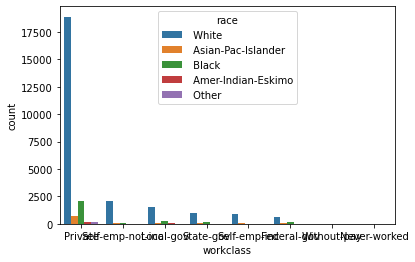

In [143]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'workclass', hue = 'race')

####  나이와 소득에 연관성 (y)

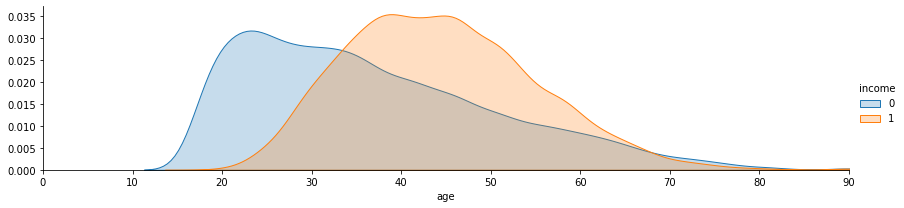

In [15]:
facet = sns.FacetGrid(train, hue="income",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, train['age'].max()))
facet.add_legend()
 
plt.show()

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

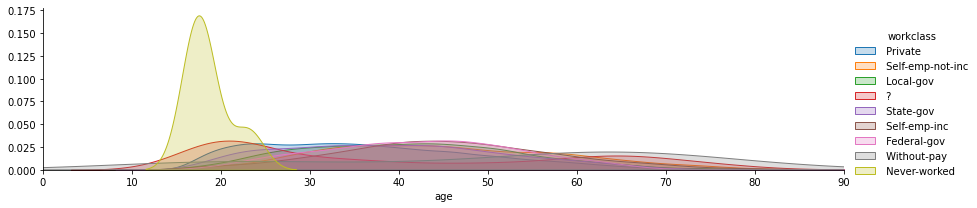

In [9]:
facet = sns.FacetGrid(train, hue="workclass",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, train['age'].max()))
facet.add_legend()
 
plt.show()

#### 인종에 따른 급여 차이확인
- 

<AxesSubplot:xlabel='workclass', ylabel='count'>

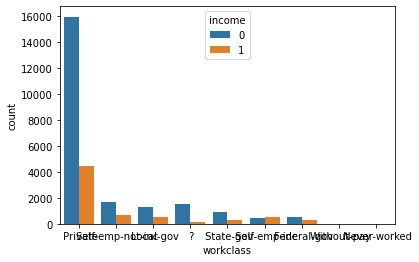

In [8]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'race', hue = 'income')

<AxesSubplot:xlabel='race', ylabel='age'>

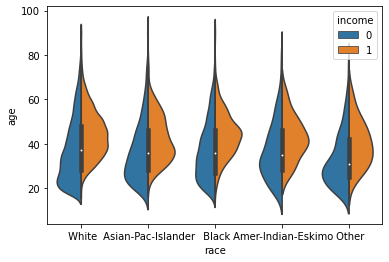

In [9]:
sns.violinplot(data = train, x = 'race', y = 'age', hue='income', split = True)

#### 교육시간이 많을 수록 소득이 증가 
- 9~10시간의 교육시간은 가장 높은 비율로 소득이 50k이하

<AxesSubplot:xlabel='education-num', ylabel='count'>

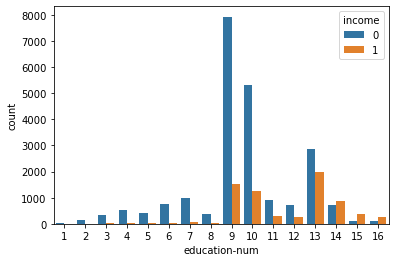

In [13]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'education-num', hue = 'income')

# 5. 모델  선택 및 하이퍼파라미터 조정

# 6. 학습

# 7. 평가